## Possibly Useful Libraries

In [1]:
!pip install python-igraph

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Import Necessary Items
import json as simplejson
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import igraph as ig
import networkx as nx
from matplotlib import colors
np.random.seed(10)

## Edges: Random Users' Sequences of Movies Watched

In [3]:
# DF with Movie Genre
movie_id_and_genre = pd.read_csv('movies.csv', header = 0, delimiter=',')
movie_id_and_genre = movie_id_and_genre.drop(movie_id_and_genre.columns[[1]], axis = 1)
movie_id_and_genre.head()

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy


In [4]:
# DF with Rating and Timestamp
rating_user_movie_timestamp = pd.read_csv('ratings.csv', header = 0, delimiter=',')
rating_user_movie_timestamp.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# Now We Make a New DF for Rating and Genre
rating_user_genre_timestamp = rating_user_movie_timestamp

In [6]:
rating_user_genre_timestamp.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
# Generate Random User ID's
add_n = 13849
import random
random_users_to_keep = random.sample(range(1, 138493), add_n)
# print(random_users_to_keep)

In [8]:
# Create DF with Only Those Users' Information
df = rating_user_genre_timestamp

list_of_user_df = []
users_tuple = []

for x in range(0, add_n):
    temp_df = []
    temp_df = df[df.userId == random_users_to_keep[x]]
    temp_df = temp_df.sort_values('timestamp')
    temp_df.reset_index(drop=True, inplace=True)
    list_of_user_df.append(temp_df)
    
    temp_list = []
    temp_list = list_of_user_df[x]['movieId'].tolist()
    for y in range(0, len(temp_list) - 1):
        users_tuple.append((tuple(temp_list[y:(y+2)])))

len(users_tuple)

1941914

## Vertices: Movie ID's

In [9]:
# Create Movie ID's
movies = list(range(27278))
movies = [x+1 for x in movies]

## The Network

##### Tutorial: Applying My Data to a Network (Based off of Tutorial)

#### https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html

In [10]:
# Create a Graph

# G=nx.DiGraph() # for a directed graph
# G=nx.Graph() # for a non-directed graph 
# G=nx.MultiGraph() # for a graph where multiple edges point to the same vertex

G=nx.MultiGraph()

In [11]:
# Add Nodes
G.add_nodes_from(movies)

In [12]:
# Add Edges
G.add_edges_from(users_tuple)
print('edges added')

edges added


In [13]:
G.number_of_nodes()

35749

In [14]:
G.number_of_edges()

1941914

In [15]:
# Check if Vertex and Edge Inputs Worked
# G.nodes()
# G.edges()
# G.neighbors(1359)

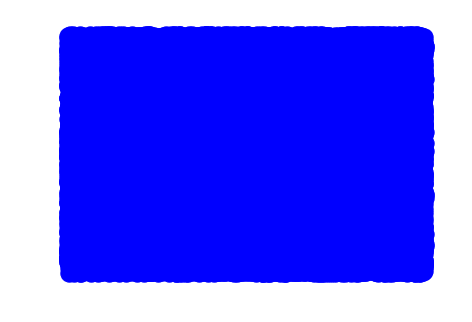

In [16]:
# Draw Initial Network
nx.draw_random(G, node_color='blue', edge_color='red')
plt.savefig("Images/NetA.png")
plt.show()

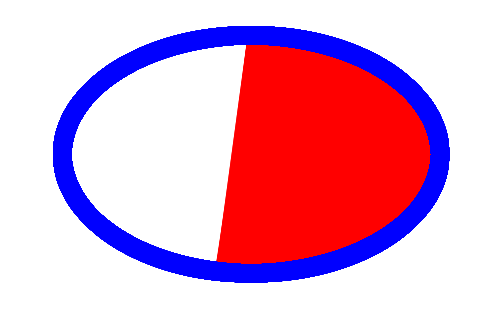

In [17]:
# Draw Initial Network
nx.draw_circular(G, node_color='blue', edge_color='red')
plt.savefig("Images/NetB.png")
plt.show()

In [18]:
# Remove Vertices That Don't Have Any Edge Connections
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

35749
17238


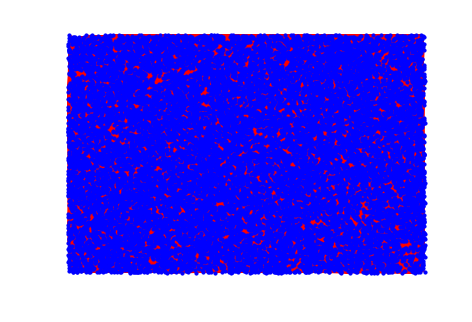

In [19]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetC.png")
plt.show()

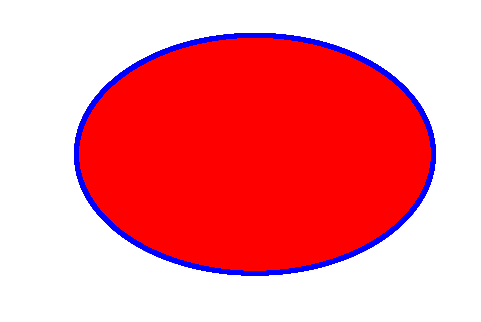

In [20]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetD.png")
plt.show()

In [21]:
# Remove Vertices That Don't Have More Than 4 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 5]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

17238
12187


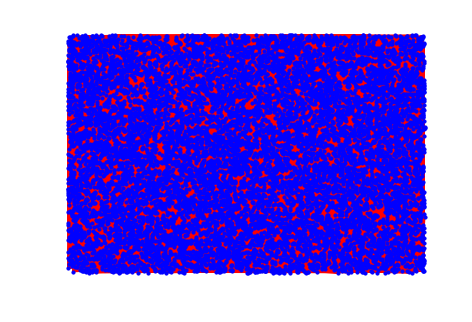

In [22]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetE.png")
plt.show()

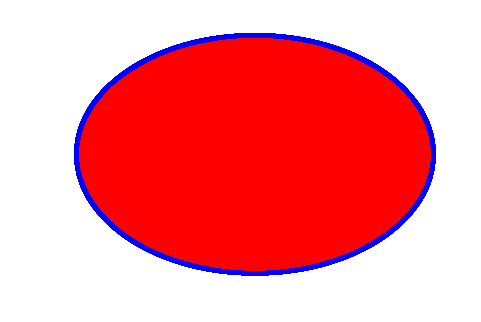

In [23]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetF.png")
plt.show()

In [24]:
# Remove Vertices That Don't Have More Than 5 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 6]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

12187
11829


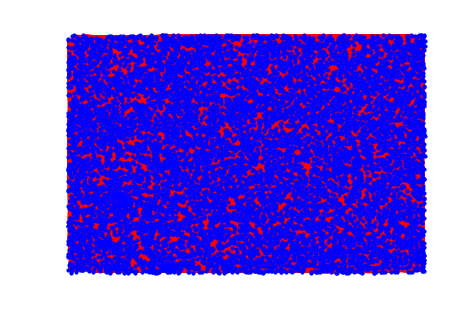

In [25]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

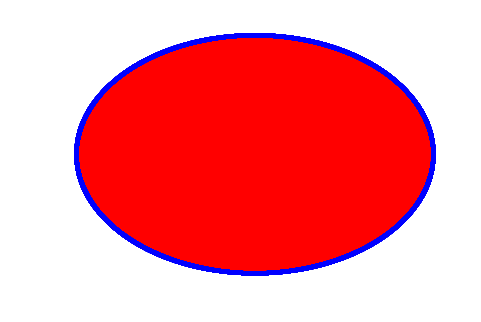

In [26]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [27]:
# Remove Vertices That Don't Have More Than 9 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 10]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

11829
10310


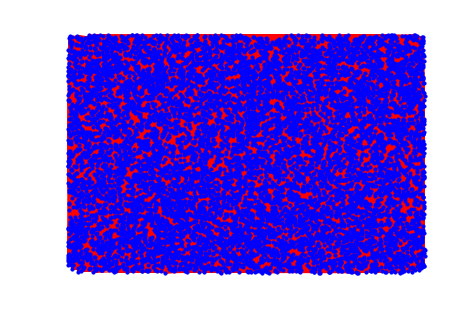

In [28]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

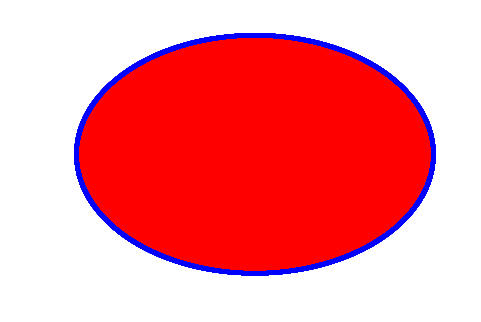

In [29]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [30]:
# Remove Vertices That Don't Have More Than 29 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 30]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

10310
7275


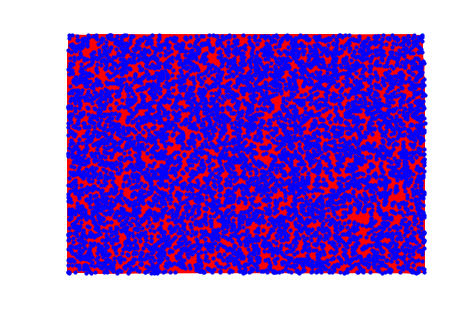

In [31]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

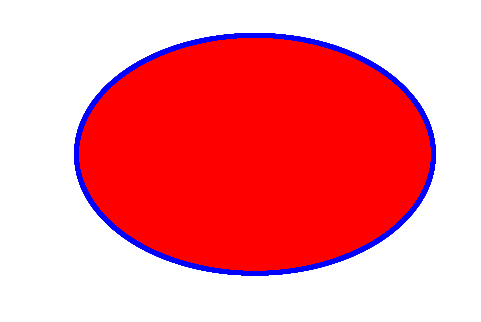

In [32]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [33]:
# Remove Vertices That Don't Have More Than 34 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 35]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

7275
6696


In [34]:
# Remove Vertices That Don't Have More Than 44 Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 45]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

6696
6019


In [35]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 55]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

6019
5452


In [36]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 65]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

5452
4997


In [37]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 75]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

4997
4617


In [38]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 85]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

4617
4313


In [39]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 95]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

4313
4058


In [40]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 105]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

4058
3843


In [41]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 115]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

3843
3653


In [42]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 125]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

3653
3478


In [43]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 135]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

3478
3314


In [44]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 145]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

3314
3178


In [45]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 165]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

3178
2954


In [46]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 185]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2954
2732


In [47]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 195]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2732
2596


In [48]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 200]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2596
2527


In [49]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 210]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2527
2434


In [50]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 220]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2434
2343


In [51]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 230]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2343
2253


In [52]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 240]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2253
2167


In [53]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 250]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2167
2097


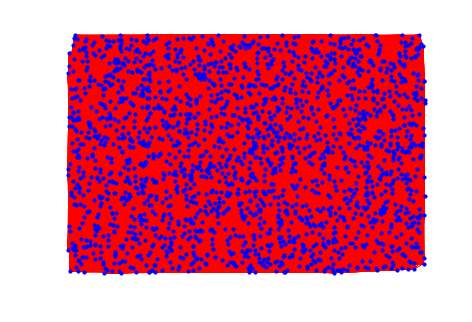

In [54]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

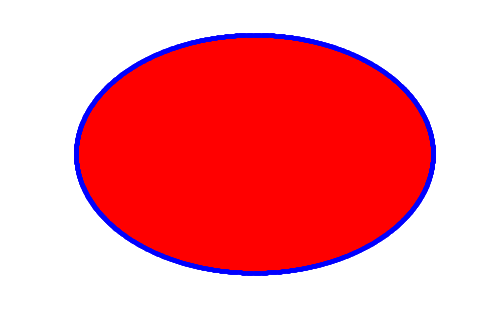

In [55]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [56]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 260]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2097
2027


In [57]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 280]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

2027
1943


In [58]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 260]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1943
1942


In [59]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 280]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1942
1926


In [60]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 300]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1926
1869


In [61]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 320]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1869
1797


In [62]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 340]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1797
1720


In [63]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 360]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1720
1648


In [64]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 380]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1648
1573


In [65]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 400]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1573
1508


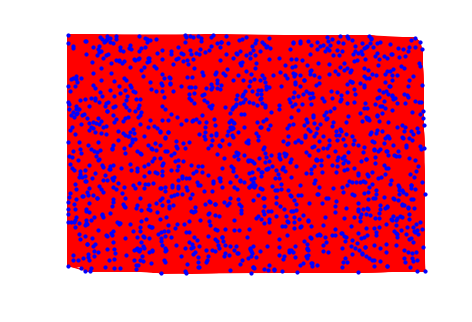

In [66]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

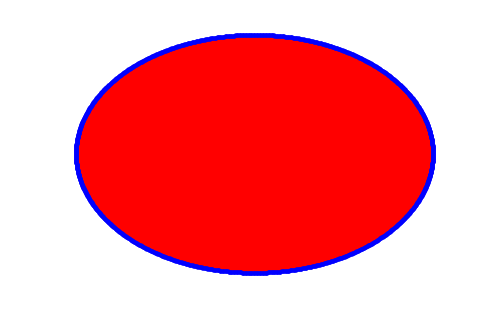

In [67]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [68]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 420]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1508
1445


In [69]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 440]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1445
1395


In [70]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 460]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1395
1328


In [71]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 480]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1328
1274


In [72]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 500]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1274
1214


In [73]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 550]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1214
1119


In [74]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 600]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1119
1013


In [75]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 650]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

1013
913


In [76]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 700]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

913
825


In [77]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 800]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

825
732


In [78]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 900]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

732
628


In [79]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1000]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

628
516


In [80]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1200]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

516
417


In [81]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1400]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

417
345


In [82]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1600]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

345
264


In [83]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1800]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

264
194


In [84]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 2000]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

194
140


In [85]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 2200]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

140
97


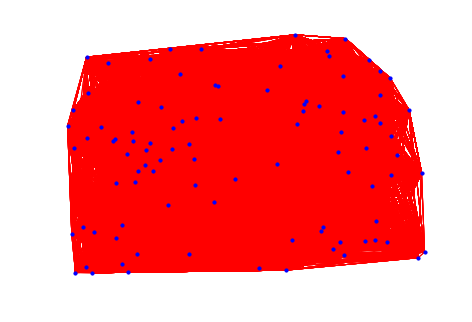

In [86]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

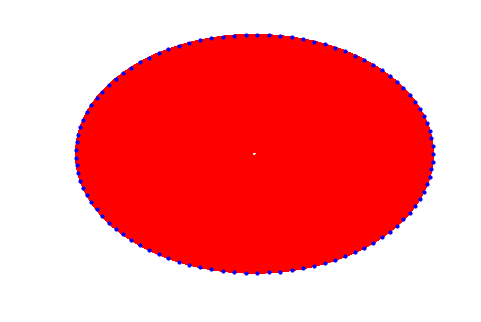

In [87]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()

In [88]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 2400]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

97
71


In [89]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 2600]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

71
57


In [90]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 2800]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

57
41


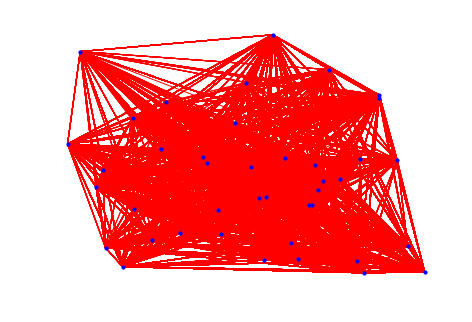

In [91]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

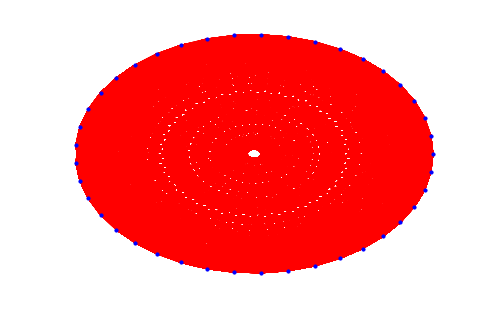

In [92]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()


In [93]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 3000]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

41
25


In [94]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 3200]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

25
16


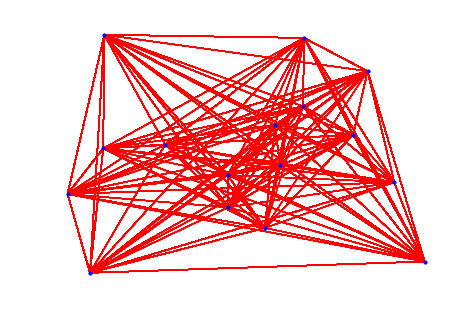

In [95]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

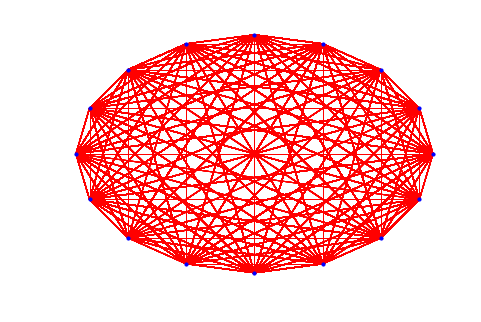

In [96]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()


In [97]:
# Remove Vertices That Don't Have More Than Various Edges
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 3400]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

16
8


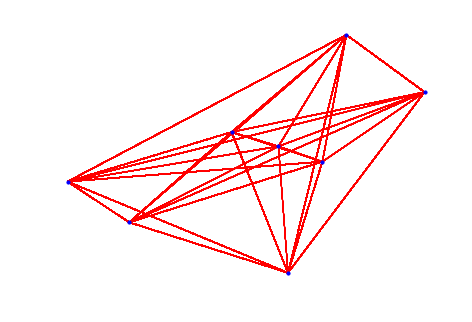

In [98]:
# Re-Draw Network
nx.draw_random(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetG.png")
plt.show()

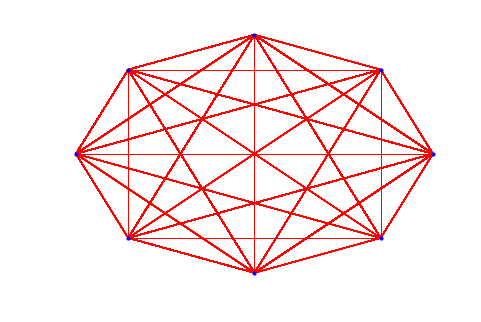

In [99]:
# Re-Draw Network
nx.draw_circular(G, node_color='blue', edge_color='red', linewidths=1, node_size=10)
plt.savefig("Images/NetH.png")
plt.show()